## _*H2 plot with different basis sets used*_

This notebook demonstrates using Qiskit Nature to plot graphs of the ground state energy of the Hydrogen (H2) molecule over a range of inter-atomic distances in different basis sets.

In [1]:
import numpy as np
import pylab

from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats import MoleculeInfo
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

from qiskit_algorithms import NumPyMinimumEigensolver

In [4]:
def compute_energies(basis, distances):
    energies = []

    for d in distances:
        info = MoleculeInfo(["H", "H"], [(0.0, 0.0, 0.0), (0.0, 0.0, d)])
        driver = PySCFDriver.from_molecule(info, basis=basis)
        molecule = driver.run()
        mapper = JordanWignerMapper()

        algo = NumPyMinimumEigensolver()
        algo.filter_criterion = molecule.get_default_filter_criterion()
        solver = GroundStateEigensolver(mapper, algo)
        result = solver.solve(molecule)
        energies.append(result.total_energies[0])

    return energies

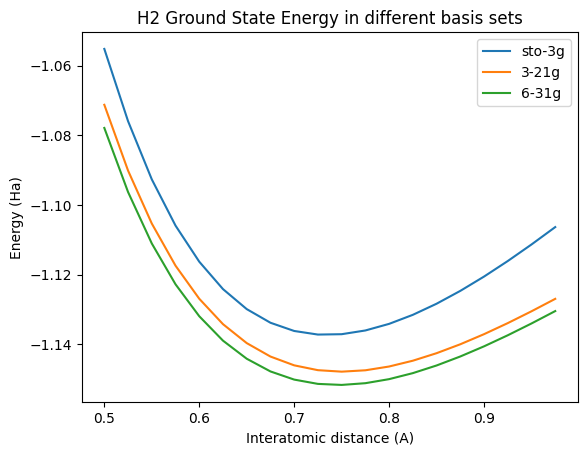

In [5]:
basis_sets = ['sto-3g', '3-21g', '6-31g']
distances  = [0.5 + 0.025*x  for x in range(0, 20)]

for b in basis_sets:
    pylab.plot(distances, compute_energies(b, distances), label=b)

pylab.xlabel('Interatomic distance (A)')
pylab.ylabel('Energy (Ha)')
pylab.title('H2 Ground State Energy in different basis sets')
pylab.legend(loc='upper right')

In [6]:
! pip freeze | grep qiskit

qiskit==1.1.0
qiskit-aer==0.14.2
qiskit-algorithms==0.3.0
qiskit-ibm-runtime==0.25.0
qiskit-machine-learning==0.7.2
qiskit-nature==0.7.2
qiskit-nature-pyscf==0.4.0
qiskit-qasm3-import==0.5.0
qiskit-transpiler-service==0.4.5
